#Importing The Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


#Import The Dataset

In [ ]:
df=pd.read_csv('/content/Mobile_data.csv')

In [ ]:
df.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1

In [ ]:
df.shape

(2000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
  df.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [ ]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

In [ ]:
df.corr()

battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.011482  0.033334   -0.004004  0.034085   
clock_speed         0.011482     1.000000 -0.000434    0.006545 -0.014364   
fc                  0.033334    -0.000434  1.000000   -0.029133 -0.001791   
int_memory         -0.004004     0.006545 -0.029133    1.000000  0.006886   
m_dep               0.034085    -0.014364 -0.001791    0.006886  1.000000   
mobile_wt           0.001844     0.012350  0.023618   -0.034214  0.021756   
n_cores            -0.029727    -0.005724 -0.013356   -0.028310 -0.003504   
pc                  0.031441    -0.005245  0.644595   -0.033273  0.026282   
px_height           0.014901    -0.014523 -0.009990    0.010441  0.025263   
px_width           -0.008402    -0.009476 -0.005176   -0.008335  0.023566   
ram                -0.000653     0.003443  0.015099    0.032813 -0.009434   
sc_h               -0.029959    -0.029078 -0.011014    0.037771 -0.025348   
sc_w               -0.021421    -0.007378 -0.012373    0.011731 -0.018388   
talk_time           0.052510    -0.011432 -0.006829   -0.002790  0.017003   
price_range         0.200723    -0.006606  0.021998    0.044435  0.000853   

               mobile_wt   n_cores        pc  px_height  px_width       ram  \
battery_power   0.001844 -0.029727  0.031441   0.014901 -0.008402 -0.000653   
clock_speed     0.012350 -0.005724 -0.005245  -0.014523 -0.009476  0.003443   
fc              0.023618 -0.013356  0.644595  -0.009990 -0.005176  0.015099   
int_memory     -0.034214 -0.028310 -0.033273   0.010441 -0.008335  0.032813   
m_dep           0.021756 -0.003504  0.026282   0.025263  0.023566 -0.009434   
mobile_wt       1.000000 -0.018989  0.018844   0.000939  0.000090 -0.002581   
n_cores        -0.018989  1.000000 -0.001193  -0.006872  0.024480  0.004868   
pc              0.018844 -0.001193  1.000000  -0.018465  0.004196  0.028984   
px_height       0.000939 -0.006872 -0.018465   1.000000  0.510664 -0.020352   
px_width        0.000090  0.024480  0.004196   0.510664  1.000000  0.004105   
ram            -0.002581  0.004868  0.028984  -0.020352  0.004105  1.000000   
sc_h           -0.033855 -0.000315  0.004938   0.059615  0.021599  0.015996   
sc_w           -0.020761  0.025826 -0.023819   0.043038  0.034699  0.035576   
talk_time       0.006209  0.013148  0.014657  -0.010645  0.006720  0.010820   
price_range    -0.030302  0.004399  0.033599   0.148858  0.165818  0.917046   

                   sc_h      sc_w  talk_time  price_range  
battery_power -0.029959 -0.021421   0.052510     0.200723  
clock_speed   -0.029078 -0.007378  -0.011432    -0.006606  
fc            -0.011014 -0.012373  -0.006829     0.021998  
int_memory     0.037771  0.011731  -0.002790     0.044435  
m_dep         -0.025348 -0.018388   0.017003     0.000853  
mobile_wt     -0.033855 -0.020761   0.006209    -0.030302  
n_cores       -0.000315  0.025826   0.013148     0.004399  
pc             0.004938 -0.023819   0.014657     0.033599  
px_height      0.059615  0.043038  -0.010645     0.148858  
px_width       0.021599  0.034699   0.006720     0.165818  
ram            0.015996  0.035576   0.010820     0.917046  
sc_h           1.000000  0.506144  -0.017335     0.022986  
sc_w           0.506144  1.000000  -0.022821     0.038711  
talk_time     -0.017335 -0.022821   1.000000     0.021859  
price_range    0.022986  0.038711   0.021859     1.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5ce855b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5ce855280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5ce855ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5ce328430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5ce3286d0>],
 'means': []}

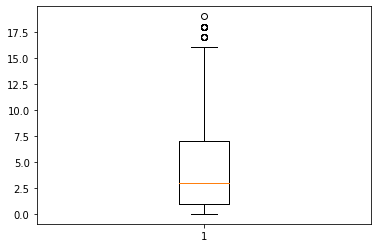

In [ ]:
plt.boxplot(df['fc'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd5cba7ef70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd5cba0e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd5cba6dbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5cba0ea30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5cba0ecd0>],
 'means': []}

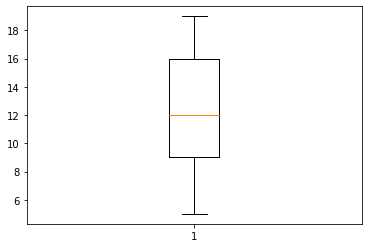

In [ ]:
plt.boxplot(df['sc_h'])

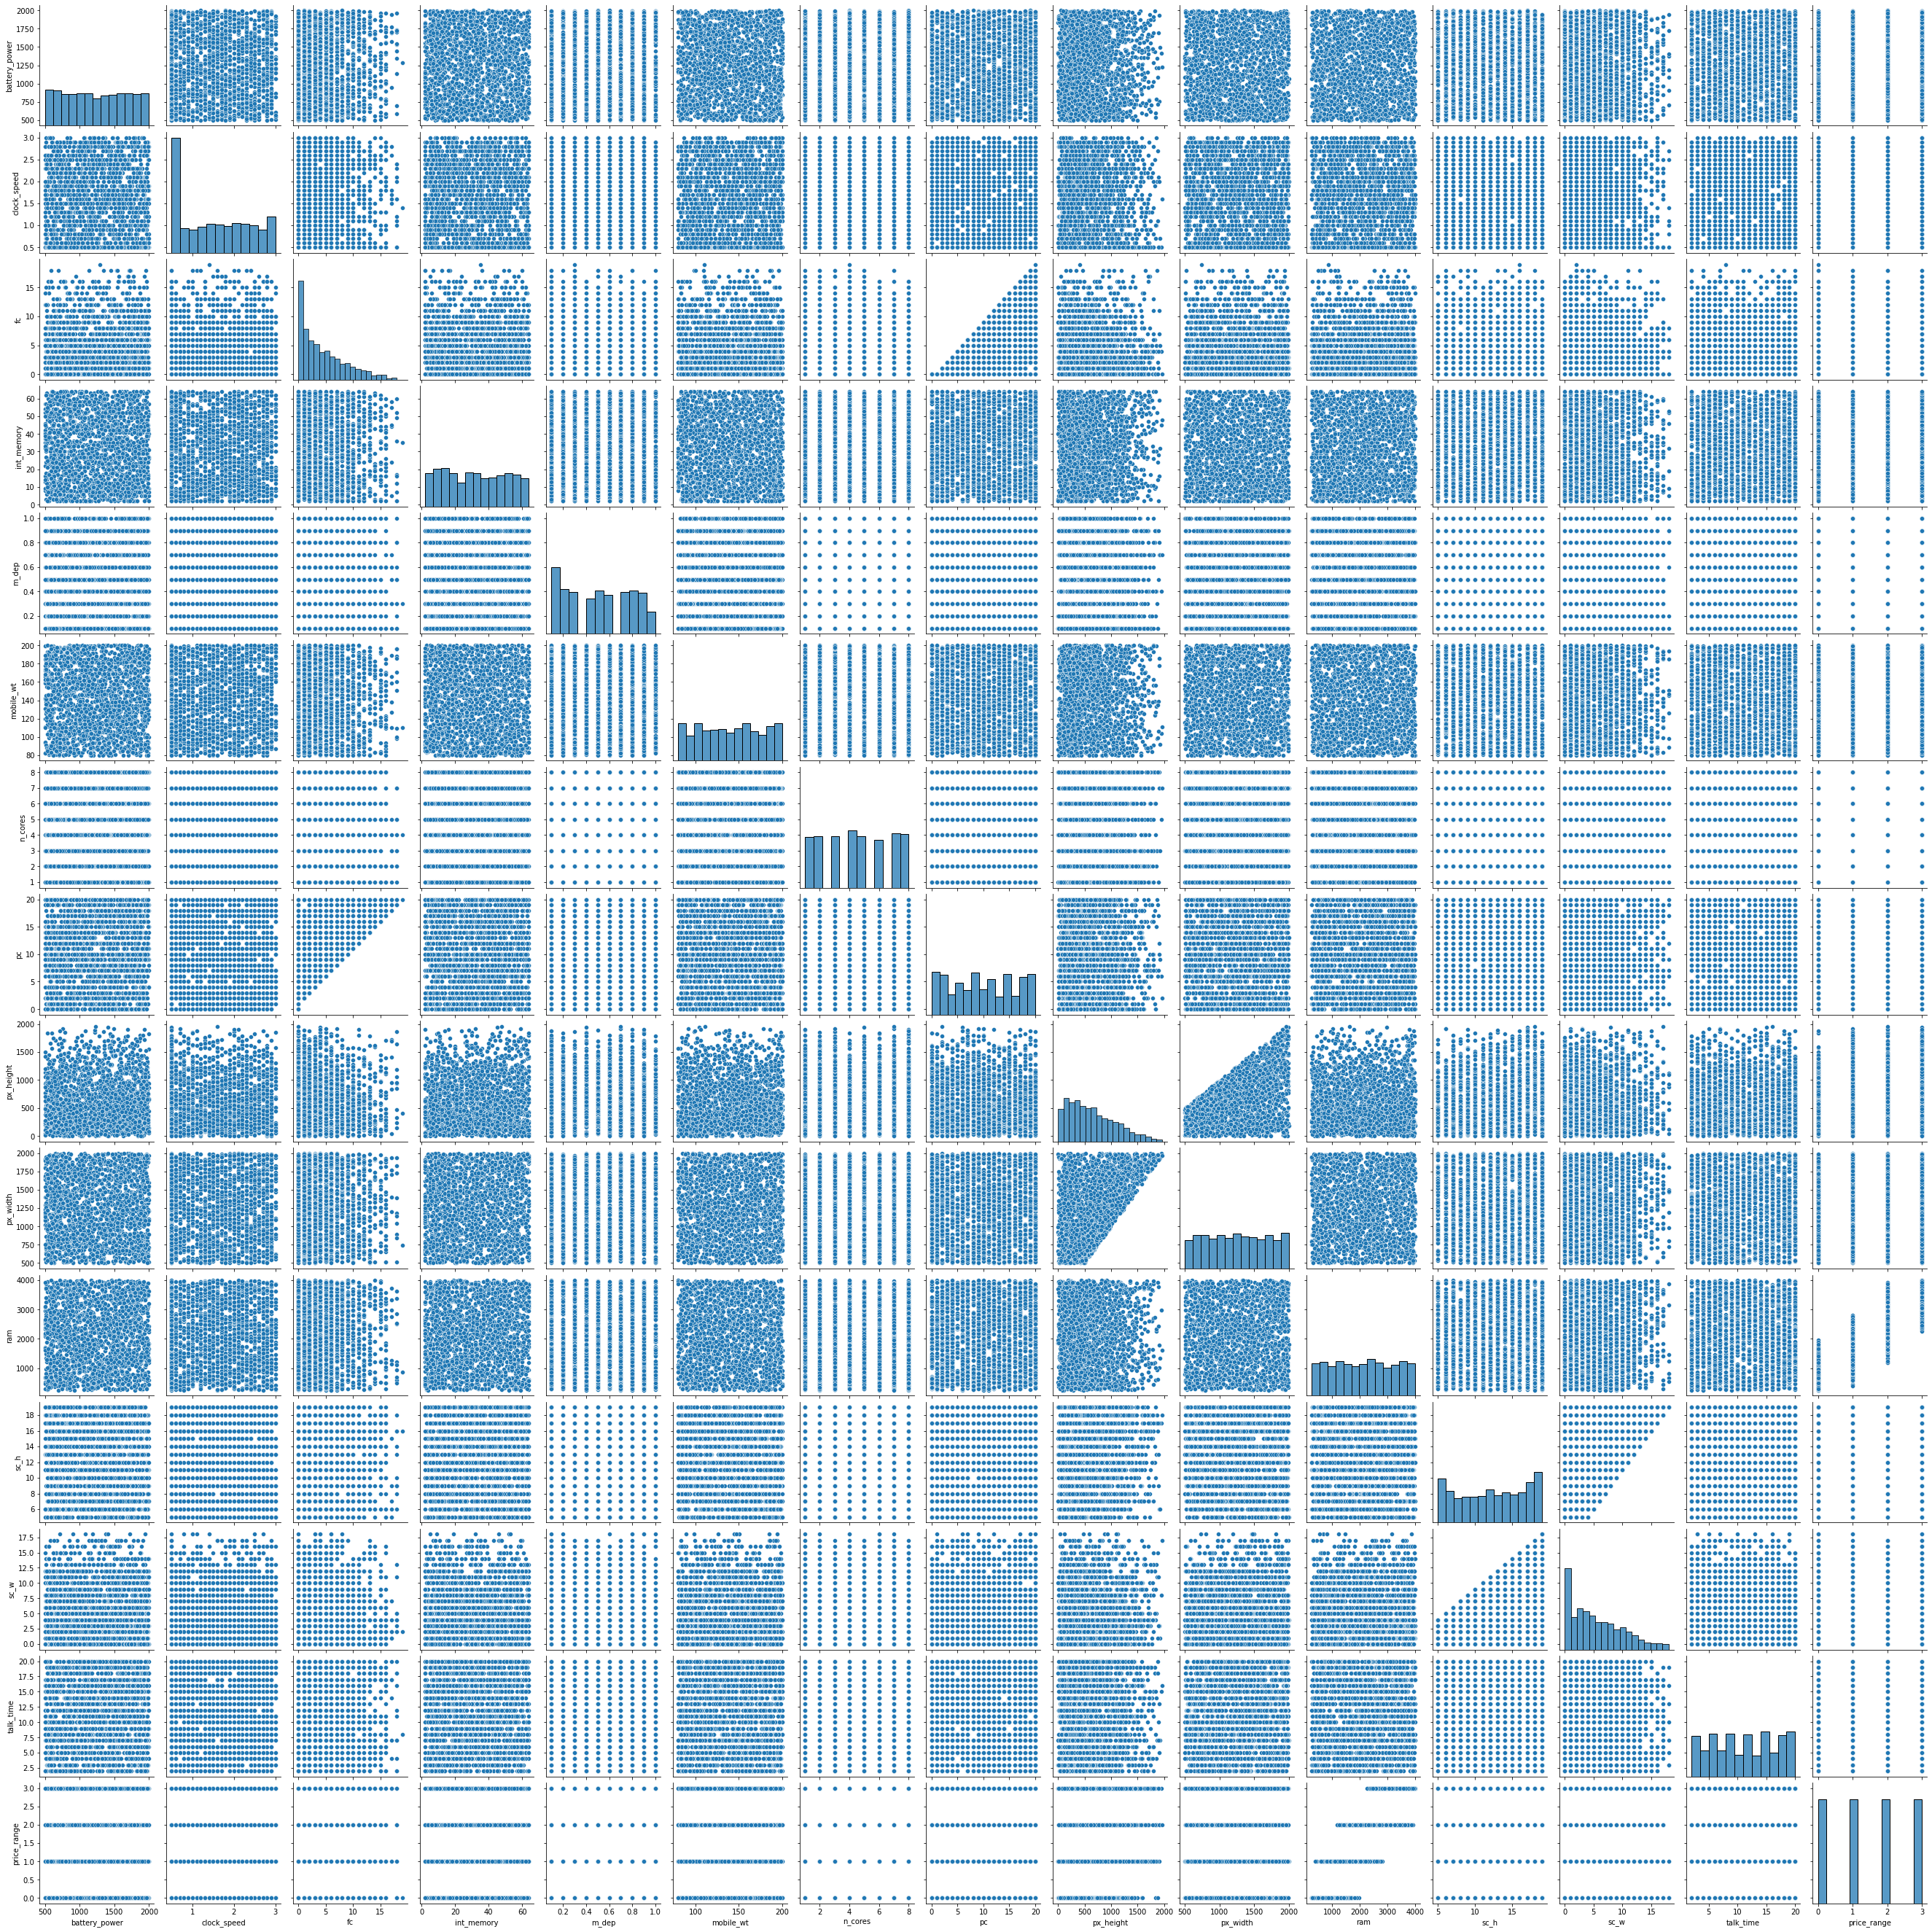

In [ ]:
sns.pairplot(df)

<Axes: >

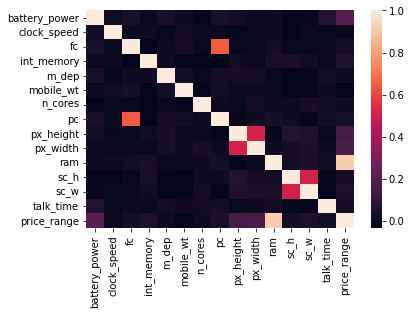

In [ ]:
sns.heatmap(df.corr())

#Split the data into train and test split

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def acc(actual,prediction):
    acc_score=accuracy_score(actual,prediction)
    cn_matrix=confusion_matrix(actual,prediction)
    cla_report=classification_report(actual,prediction)
    print('accuracy::',acc_score)
    print(cn_matrix)
    print(cla_report)
acc(y_test,preds_ytest_lr)
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
acc(y_train,preds_ytrain_lr)

accuracy:: 0.635
[[65 22  0  0]
 [20 61 13  6]
 [ 0 29 44 43]
 [ 0  0 13 84]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.54      0.61      0.58       100
           2       0.63      0.38      0.47       116
           3       0.63      0.87      0.73        97

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.63       400
weighted avg       0.64      0.64      0.62       400

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
accuracy:: 0.6425
[[332  76   5   0]
 [ 67 216  89  28]
 [  1  91 174 118]
 [  0   4  93 306]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       413
           1       0.56      0.54      0.55       400
           2       0.48      0.45      0.47       384
           3       0.68      0.76      0.72       403

    accuracy               

#DecisionTreeClassifier


In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preds_ytrain_dtc=dtc.predict(x_train)
preds_ytest_dtc=dtc.predict(x_test)

In [ ]:
acc(y_train,preds_ytrain_dtc)
acc(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

accuracy:: 0.8175
[[78  9  0  0]
 [ 8 79 13  0]
 [ 0 16 85 15]
 [ 0  0 12 85]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        87
           1       0.76      0.79      0.77       100
           2       0.77      0.73      0.75       116
           3       0.85      0.88      0.86        97

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg  

#RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
acc(y_train,preds_rf_train)
acc(y_test,preds_rf_test)

accuracy:: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

accuracy:: 0.89
[[87  0  0  0]
 [ 8 86  6  0]
 [ 0 12 92 12]
 [ 0  0  6 91]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        87
           1       0.88      0.86      0.87       100
           2       0.88      0.79      0.84       116
           3       0.88      0.94      0.91        97

    accuracy                           0.89       400
   macro avg       0.89      0.90      0.89       400
weighted avg    

#AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=200)
ada.fit(x_train,y_train)
preds_ada_train=ada.predict(x_train)
preds_ada_test=ada.predict(x_test)

In [ ]:
def model_eval (actual,prediction):
    acc_score=accuracy_score(actual,prediction)
    cn_matrix =confusion_matrix(actual,prediction)
    cla_rep=classification_report(actual,prediction)
    print(acc_score)
    print(cn_matrix)
    print(cla_rep)

In [ ]:
model_eval(y_train,preds_ada_train)

0.813125
[[333  80   0   0]
 [ 40 339  21   0]
 [  0  38 298  48]
 [  0   0  72 331]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       413
           1       0.74      0.85      0.79       400
           2       0.76      0.78      0.77       384
           3       0.87      0.82      0.85       403

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.81      0.81      1600



In [ ]:
model_eval(y_test,preds_ada_test)

0.7725
[[63 24  0  0]
 [18 79  3  0]
 [ 0 12 89 15]
 [ 0  0 19 78]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        87
           1       0.69      0.79      0.73       100
           2       0.80      0.77      0.78       116
           3       0.84      0.80      0.82        97

    accuracy                           0.77       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.78      0.77      0.77       400



#GradientBoostingClassifier


In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)

In [ ]:
model_eval(y_train,preds_gb_train)
model_eval(y_test,preds_gb_test)

0.999375
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

0.9025
[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.

#KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)
preds_knn_train=knn.predict(x_train)
preds_knn_test=knn.predict(x_test)

In [ ]:

model_eval(y_train,preds_knn_train)
model_eval(y_test,preds_knn_test)

0.93875
[[406   7   0   0]
 [ 14 371  15   0]
 [  0  25 337  22]
 [  0   0  15 388]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       413
           1       0.92      0.93      0.92       400
           2       0.92      0.88      0.90       384
           3       0.95      0.96      0.95       403

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

0.925
[[ 86   1   0   0]
 [  7  90   3   0]
 [  0   8 102   6]
 [  0   0   5  92]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.91      0.90      0.90       100
           2       0.93      0.88      0.90       116
           3       0.94      0.95      0.94        97

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.93       400
weighted avg     

#Support Vector Machine

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
svc_preds_train=svc.predict(x_train)
svc_preds_test=svc.predict(x_test)


In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print(cn_matrix)
   print(cla_report)


In [ ]:
acc_report(y_train,svc_preds_train)
acc_report(y_test,svc_preds_test)

accuracy:: 0.95375
[[405   8   0   0]
 [  8 385   7   0]
 [  0  18 339  27]
 [  0   0   6 397]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       413
           1       0.94      0.96      0.95       400
           2       0.96      0.88      0.92       384
           3       0.94      0.99      0.96       403

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

accuracy:: 0.945
[[ 87   0   0   0]
 [  4  95   1   0]
 [  0   7 102   7]
 [  0   0   3  94]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        87
           1       0.93      0.95      0.94       100
           2       0.96      0.88      0.92       116
           3       0.93      0.97      0.95        97

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95      

#SMOTE

In [ ]:
oversample=SMOTE()

In [ ]:
x_smote,y_smote=oversample.fit_resample(x,y)

In [ ]:
print(x_smote.shape)
print(y_smote.shape)

(2000, 14)
(2000,)


#Train and Split For Smote

In [ ]:
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_smote,y_smote,test_size=0.2,random_state=23)

In [ ]:
print(x_train_smote.shape)
print(x_test_smote.shape)
print(y_test_smote.shape)
print(y_train_smote.shape)

(1600, 14)
(400, 14)
(400,)
(1600,)


#SVC For SMOTE

In [ ]:
svc=SVC()
svc.fit(x_train_smote,y_train_smote)
svc_preds_train_smote=svc.predict(x_train_smote)
svc_preds_test_smote=svc.predict(x_test_smote)

In [ ]:
acc_report(y_train_smote,svc_preds_train_smote)
acc_report(y_test_smote,svc_preds_test_smote)

accuracy:: 0.9475
[[394   9   0   0]
 [ 14 385   6   0]
 [  0  19 352  24]
 [  0   0  12 385]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       403
           1       0.93      0.95      0.94       405
           2       0.95      0.89      0.92       395
           3       0.94      0.97      0.96       397

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

accuracy:: 0.9675
[[ 97   0   0   0]
 [  4  89   2   0]
 [  0   3  98   4]
 [  0   0   0 103]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        97
           1       0.97      0.94      0.95        95
           2       0.98      0.93      0.96       105
           3       0.96      1.00      0.98       103

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97      

#Guassian Naives Bayes

In [ ]:
gb=GaussianNB()
gb.fit(x_train_smote,y_train_smote)
gb_preds_train_smote=gb.predict(x_train_smote)
gb_preds_test_smote=gb.predict(x_test_smote)

In [ ]:
acc_report(y_train_smote,gb_preds_train_smote)
acc_report(y_test_smote,gb_preds_test_smote)

accuracy:: 0.81625
[[362  41   0   0]
 [ 38 299  68   0]
 [  0  69 289  37]
 [  0   1  40 356]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       403
           1       0.73      0.74      0.73       405
           2       0.73      0.73      0.73       395
           3       0.91      0.90      0.90       397

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600

accuracy:: 0.825
[[92  5  0  0]
 [ 7 67 21  0]
 [ 0 16 75 14]
 [ 0  0  7 96]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        97
           1       0.76      0.71      0.73        95
           2       0.73      0.71      0.72       105
           3       0.87      0.93      0.90       103

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted av